### TMDB Movie Data Analysis

### TASK 1
### Load the movie dataset in python notebook.Display the no.of rows and columns in the dataset.Display the titles and genres of the first 50 movies from the dataset

In [6]:
import pandas as pd

df = pd.read_csv('DS1_C8_V3_ND_Sprint2_Data Analysis Using Python_Dataset.csv')

# Display the number of rows and columns in the dataset
num_rows, num_columns = df.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")


Number of Rows: 4803
Number of Columns: 20


In [2]:
# Display titles and genres of the first 50 movies
first_50_movies = df.head(50)
titles_and_genres = first_50_movies[['title', 'genres']]

print("Titles and Genres of the First 50 Movies:")
print(titles_and_genres)

Titles and Genres of the First 50 Movies:
                                          title  \
0                                        Avatar   
1      Pirates of the Caribbean: At World's End   
2                                       Spectre   
3                         The Dark Knight Rises   
4                                   John Carter   
5                                  Spider-Man 3   
6                                       Tangled   
7                       Avengers: Age of Ultron   
8        Harry Potter and the Half-Blood Prince   
9            Batman v Superman: Dawn of Justice   
10                             Superman Returns   
11                            Quantum of Solace   
12   Pirates of the Caribbean: Dead Man's Chest   
13                              The Lone Ranger   
14                                 Man of Steel   
15     The Chronicles of Narnia: Prince Caspian   
16                                 The Avengers   
17  Pirates of the Caribbean: On Strange

### TASK 2
### Identify the columns that have null values and perform the null value treatment(Choose the imputation method based on the type of data in the columns of interest)

In [3]:
# Display columns with null values
null_columns = df.columns[df.isnull().any()]
print("Columns with Null Values:")
print(null_columns)

# Perform null value treatment based on the type of data in the columns

# Example: Fill null values in numeric columns with mean
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill null values in categorical columns with mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Display the updated DataFrame after null value treatment
print("\nDataFrame after Null Value Treatment:")
print(df)


Columns with Null Values:
Index(['homepage', 'overview', 'release_date', 'runtime', 'tagline'], dtype='object')

DataFrame after Null Value Treatment:
         budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

        

### TASK 3
### Display the movie categories that have a budget greater than $220000

In [4]:
# Filter rows where budget is greater than $220,000
high_budget_movies = df[df['budget'] > 220000]

# Display the genres of movies with high budget
print("Movie Categories (Genres) where Budget is Greater than $220,000:")
print(high_budget_movies['genres'])

Movie Categories (Genres) where Budget is Greater than $220,000:
0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4680    [{"id": 80, "name": "Crime"}, {"id": 27, "name...
4682                       [{"id": 27, "name": "Horror"}]
4720                        [{"id": 18, "name": "Drama"}]
4758    [{"id": 53, "name": "Thriller"}, {"id": 878, "...
4770    [{"id": 18, "name": "Drama"}, {"id": 35, "name...
Name: genres, Length: 3684, dtype: object


### TASK 4
### Display the movie categories where the revenue is greater than $961000000

In [5]:
# Filter rows where revenue is greater than $961,000,000
high_revenue_movies = df[df['revenue'] > 961000000]

# Display the genres of movies with high revenue
print("Movie Categories (Genres) where Revenue is Greater than $961,000,000:")
print(high_revenue_movies['genres'])


Movie Categories (Genres) where Revenue is Greater than $961,000,000:
0      [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3      [{"id": 28, "name": "Action"}, {"id": 80, "nam...
7      [{"id": 28, "name": "Action"}, {"id": 12, "nam...
12     [{"id": 12, "name": "Adventure"}, {"id": 14, "...
16     [{"id": 878, "name": "Science Fiction"}, {"id"...
17     [{"id": 12, "name": "Adventure"}, {"id": 28, "...
25     [{"id": 18, "name": "Drama"}, {"id": 10749, "n...
26     [{"id": 12, "name": "Adventure"}, {"id": 28, "...
28     [{"id": 28, "name": "Action"}, {"id": 12, "nam...
29     [{"id": 28, "name": "Action"}, {"id": 12, "nam...
31     [{"id": 28, "name": "Action"}, {"id": 12, "nam...
32     [{"id": 10751, "name": "Family"}, {"id": 14, "...
36     [{"id": 878, "name": "Science Fiction"}, {"id"...
42     [{"id": 16, "name": "Animation"}, {"id": 10751...
44                        [{"id": 28, "name": "Action"}]
52     [{"id": 28, "name": "Action"}, {"id": 878, "na...
65     [{"id": 18,

### TASK 5
### In the dataset,there are some movies for which the budget and revenue columns have the value 0,which means unknown values.Remove the rows with value0 from both the budget and revenue columns

In [3]:
# Display the number of rows and columns before removing rows with zero values
print("Number of Rows and Columns before removal:")
print(df.shape)

# Remove rows with zero values in 'budget' and 'revenue' columns
df = df[(df['budget'] != 0) & (df['revenue'] != 0)]

# Display the number of rows and columns after removing rows with zero values
print("\nNumber of Rows and Columns after removal:")
print(df.shape)

Number of Rows and Columns before removal:
(4803, 20)

Number of Rows and Columns after removal:
(3229, 20)


### TASK 6
### List the top 10 movies with the highest revenues and the top 10 movies with the lease budget

In [10]:
# Top 10 movies with highest revenues
top_10_revenue_movies = df.nlargest(10, 'revenue')
print("Top 10 Movies with Highest Revenues:")
print(top_10_revenue_movies[['title', 'revenue']])

# Top 10 movies with least budget
top_10_least_budget_movies = df.nsmallest(10, 'budget')
print("\nTop 10 Movies with Least Budgets:")
print(top_10_least_budget_movies[['title', 'budget']])

Top 10 Movies with Highest Revenues:
                          title     revenue
0                        Avatar  2787965087
25                      Titanic  1845034188
16                 The Avengers  1519557910
28               Jurassic World  1513528810
44                    Furious 7  1506249360
7       Avengers: Age of Ultron  1405403694
124                      Frozen  1274219009
31                   Iron Man 3  1215439994
546                     Minions  1156730962
26   Captain America: Civil War  1153304495

Top 10 Movies with Least Budgets:
                                      title  budget
265                      The Cat in the Hat       0
321                            The Campaign       0
359  Alvin and the Chipmunks: The Road Chip       0
406                        Arthur Christmas       0
409                           All That Jazz       0
453                        The Pink Panther       0
463                                 Déjà Vu       0
474                         

### TASK 7
### How are popularities of movies related with the movie budgets?Are they correlated or totally uncorrelated with each other?Write the interpretation of your analysis


Correlation between Movie Budgets and Popularities: 0.5054139990665324


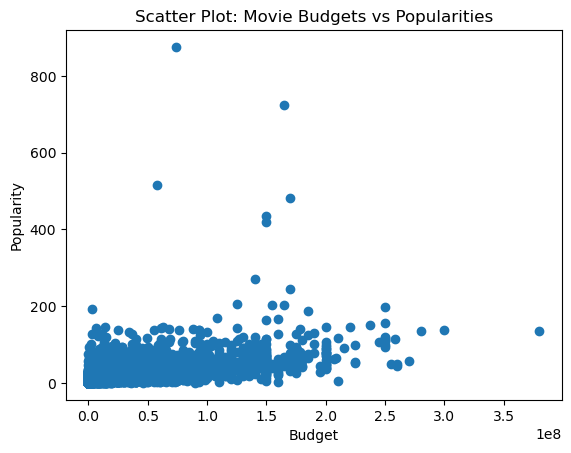

In [11]:
# Calculate the correlation between movie budgets and popularities
correlation = df['budget'].corr(df['popularity'])
print(f"\nCorrelation between Movie Budgets and Popularities: {correlation}")

# Plot a scatter plot to visualize the relationship
import matplotlib.pyplot as plt
plt.scatter(df['budget'], df['popularity'])
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.title('Scatter Plot: Movie Budgets vs Popularities')
plt.show()

### TASK 8
### Identify and display the names of all production companies along with the number of times they appear in the dataset

In [12]:
# Display production company names along with their frequency
production_company_counts = df['production_companies'].explode().value_counts()
print("\nProduction Companies and Their Frequency:")
print(production_company_counts)


Production Companies and Their Frequency:
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              351
[{"name": "Paramount Pictures", "id": 4}]                                                                                                                                                                                                                                                                                                                                                                

### TASK 9
### Display the names of the top 25 producton companies based on the no.of.movies they have produced in descending order of the no.of movies produced

In [13]:
# Top 25 production companies based on the number of movies produced
top_25_production_companies = df['production_companies'].explode().value_counts().head(25)
print("\nTop 25 Production Companies (Descending Order by Number of Movies Produced):")
print(top_25_production_companies)


Top 25 Production Companies (Descending Order by Number of Movies Produced):
[]                                                                                                                  351
[{"name": "Paramount Pictures", "id": 4}]                                                                            58
[{"name": "Universal Pictures", "id": 33}]                                                                           45
[{"name": "New Line Cinema", "id": 12}]                                                                              38
[{"name": "Columbia Pictures", "id": 5}]                                                                             37
[{"name": "Metro-Goldwyn-Mayer (MGM)", "id": 8411}]                                                                  32
[{"name": "Twentieth Century Fox Film Corporation", "id": 306}]                                                      31
[{"name": "Warner Bros.", "id": 6194}]                                            

### TASK 10
### Sort the data in descending order based on revenue and filter the top 500 movies.Find the measures of central tendency for the following columns using the filtered data
### 1.budget
### 2.revenue
### 3.runtime
### Perform outlier analysis for the above three columns using box plots

Measures of Central Tendency for Top 500 Movies by Revenue - Budget:
count    5.000000e+02
mean     1.028037e+08
std      6.268914e+07
min      0.000000e+00
25%      5.500000e+07
50%      9.500000e+07
75%      1.500000e+08
max      3.800000e+08
Name: budget, dtype: float64

Measures of Central Tendency for Top 500 Movies by Revenue - Revenue:
count    5.000000e+02
mean     4.587221e+08
std      2.684133e+08
min      2.190765e+08
25%      2.814473e+08
50%      3.630016e+08
75%      5.471332e+08
max      2.787965e+09
Name: revenue, dtype: float64

Measures of Central Tendency for Top 500 Movies by Revenue - Runtime:
count    500.00000
mean     118.62600
std       23.28378
min       70.00000
25%      100.00000
50%      116.00000
75%      132.00000
max      238.00000
Name: runtime, dtype: float64


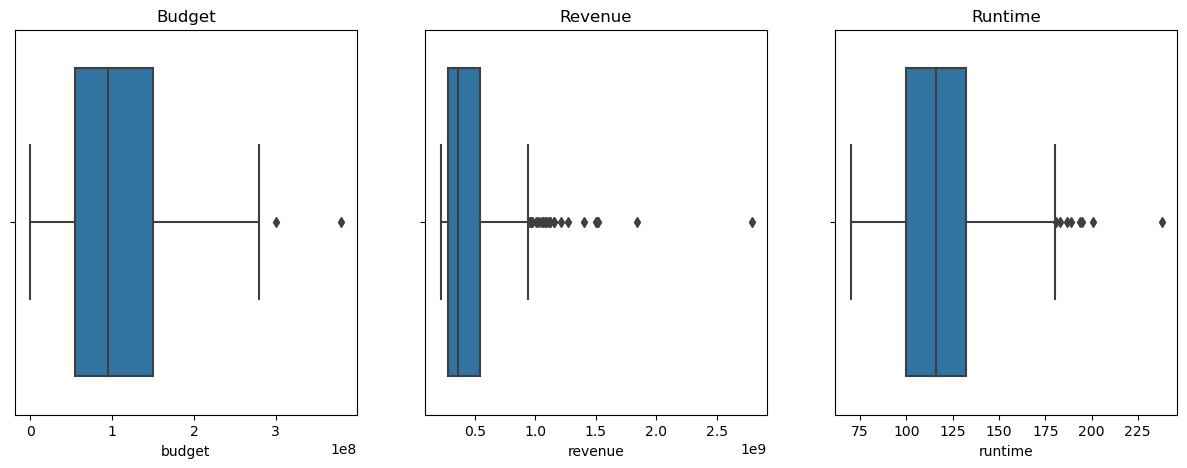

In [14]:
# Sort the data in descending order based on revenue and filter the top 500 movies
top_500_movies_by_revenue = df.sort_values(by='revenue', ascending=False).head(500)

# Measures of central tendency for budget, revenue, and runtime
central_tendency_budget = top_500_movies_by_revenue['budget'].describe()
central_tendency_revenue = top_500_movies_by_revenue['revenue'].describe()
central_tendency_runtime = top_500_movies_by_revenue['runtime'].describe()

print("Measures of Central Tendency for Top 500 Movies by Revenue - Budget:")
print(central_tendency_budget)

print("\nMeasures of Central Tendency for Top 500 Movies by Revenue - Revenue:")
print(central_tendency_revenue)

print("\nMeasures of Central Tendency for Top 500 Movies by Revenue - Runtime:")
print(central_tendency_runtime)

# Outlier analysis using box plots
import seaborn as sns
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=top_500_movies_by_revenue['budget'])
plt.title('Budget')

plt.subplot(1, 3, 2)
sns.boxplot(x=top_500_movies_by_revenue['revenue'])
plt.title('Revenue')

plt.subplot(1, 3, 3)
sns.boxplot(x=top_500_movies_by_revenue['runtime'])
plt.title('Runtime')

plt.show()

### TASK 11
### Identify and display the names of the movies along with their run times for those movies that hava above average runtime,using data from the previous task

In [15]:
# Identify movies with above-average runtime
above_average_runtime_movies = top_500_movies_by_revenue[top_500_movies_by_revenue['runtime'] > top_500_movies_by_revenue['runtime'].mean()]

# Display movie names and runtimes
print("\nMovies with Above-Average Runtime:")
print(above_average_runtime_movies[['title', 'runtime']])


Movies with Above-Average Runtime:
                           title  runtime
0                         Avatar    162.0
25                       Titanic    194.0
16                  The Avengers    143.0
28                Jurassic World    124.0
44                     Furious 7    137.0
...                          ...      ...
1161          The Social Network    120.0
912   Interview with the Vampire    123.0
521                 The Terminal    128.0
397             It's Complicated    121.0
1744                  Knocked Up    129.0

[232 rows x 2 columns]


### Additional task

### Budget vs. Revenue

C:\Users\ptsrk\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ptsrk\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


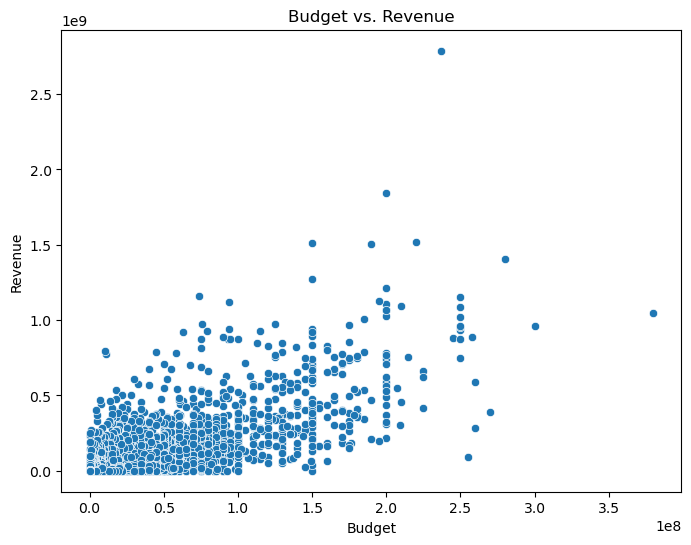

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

In [11]:
# Correlation coefficient
correlation = df['budget'].corr(df['revenue'])
print(f"Correlation between Budget and Revenue: {correlation}")


Correlation between Budget and Revenue: 0.7308228569244605


### Popularity vs. Revenue

C:\Users\ptsrk\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ptsrk\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


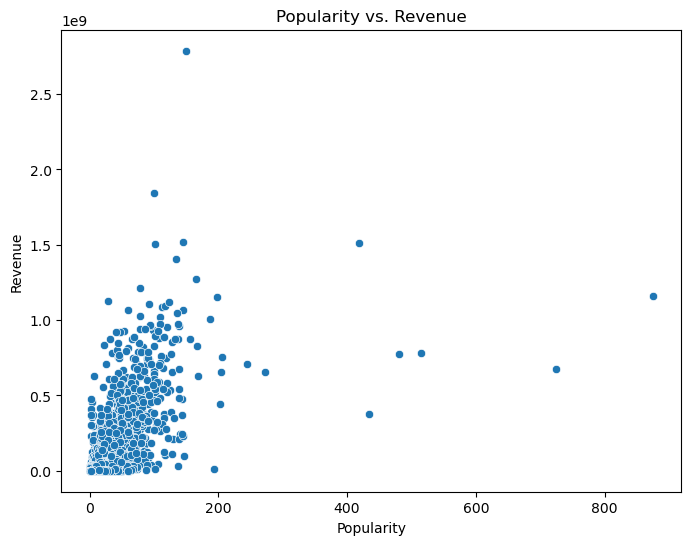

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='popularity', y='revenue', data=df)
plt.title('Popularity vs. Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

In [15]:
correlation = df['popularity'].corr(df['revenue'])
print(f"Correlation between Popularity and Revenue: {correlation}")

Correlation between Popularity and Revenue: 0.6447235045559988
